# 3. A simple model

## Model A: Independent Poisson Distributions for Football Match Results

A simple model for the result of a football match assumes that home and away goals \((X_k, Y_k)\) scored in match \(k\) follow independent Poisson distributions:

$$ X_k \sim \text{Poisson}(\lambda_k) $$
$$ Y_k \sim \text{Poisson}(\mu_k) $$

where

$$ \ln \lambda_k = \alpha_{i(k)} + \beta_{j(k)} + \gamma + \frac{\eta}{2} $$
$$ \ln \mu_k = \alpha_{j(k)} + \beta_{i(k)} + \gamma - \frac{\eta}{2} $$

In the above equations:

- $\(\lambda_k\)$ is the home team scoring rate.
- $\(\mu_k\)$ is the away team scoring rate.
- $\(i(k) \in \{1, \ldots, \text{nteams}\}\)$ is the index of the home team.
- $\(j(k) \in \{1, \ldots, \text{nteams}\}\)$ is the index of the away team.

### Log Implementation
- Possibly parameterised in terms of the log of the scoring rates due to:
    - The non-negativity constraint on the scoring rates (i.e. goal rates cannot be negative).
    - Allows for linear combinations of the parameters.

### Interpretation of Parameters

1. **$\(\alpha_i\)$**:
   - $\(\alpha_i\)$ represents attack strength for team $\(i\)$.
   - It is a measure of how effective team $\(i\)$ is at scoring goals, regardless of whether at home or away.

2. **$\(\beta_i\)$**:
   - $\(\beta_i\)$ represents defense strength of team $\(i\)$.
   - It is a measure of how effective team $\(i\)$ is at preventing goals from opposition, regardless of whether at home or away.

3. **$\(\gamma\)$**:
   - $\(\gamma\)$ common parameter that applies to both home and away teams.
   - Used to represent the average goal-rate in the league.

4. **$\(\eta\)$**:
   - $\(\eta\)$ represents the advantage from playing at home (home advantage effect).
   - Adds a boost to the home team rate and a penalty to the away team rate.
   - Specifically, $\(\frac{\eta}{2}\)$ added to the home team rate and $\(\frac{\eta}{2}\)$ subtracted from the away team rate.


## Model Identifiability

In the above model, there could be multiple sets of parameters that could result in the same likelihood value.  This is not ideal. We would like the model to be identifiable so that: <br>
- **Unique Parameters**: Each parameter can be fit/estimated uniquely.
- **Unique Likelihood**: Each set of parameters corresponds to a unique likelihood value.
- **Interpretable Parameters**: Parameters have a clear interpretation.

### Solutions to Identifiability

We can enforce constraints on the parameters to ensure identifiability. There are several ways to do this:

#### 1. Sum to zero constraints

The most common approach is to enforce sum-to-zero constraints on the attack and defence parameters (independently), namely:
$$ \sum_{i=1}^{\text{nteams}} \alpha_i = 0 $$
$$ \sum_{i=1}^{\text{nteams}} \beta_i = 0 $$

**Note:** Check if both constraints are necessary. It may be sufficient to enforce the constraint on the attack parameters only.

#### 2. Fixing a parameter 

Another common approach is to fix a "reference" parameter to zero , namely:
$$ \alpha_{\text{ref}} = 0 $$
$$ \beta_{\text{ref}} = 0 $$

It may make sense to choose the same team as the reference for both attack and defence "reference" parameters. 

## Maximum Likelihood

We will use maximum likelihood estimation to estimate the parameters of the model. The likelihood function is given by:
$$ L(\theta) = \prod_{k=1}^{\text{nmatches}} \text{Poisson}(x_k; \lambda_k) \times \text{Poisson}(y_k; \mu_k) $$
where:
- $\(\theta\)$ is the set of all parameters.
- $\(\lambda_k\)$ is the home team scoring rate for match $\(k\)$.
- $\(\mu_k\)$ is the away team scoring rate for match $\(k\)$.
- $\(\text{nmatches}\)$ is the number of matches.
- $\(\text{Poisson}(x; \lambda)\)$ is the Poisson probability mass function evaluated at $\(x\)$ with rate $\(lambda\)$.
- $\(\text{Poisson}(y; \mu)\)$ is the Poisson probability mass function evaluated at $\(y\)$ with rate $\(mu\)$.
- $\(\lambda_k\)$ and $\(\mu_k\)$ are defined as above.
- $\(x_k\)$ is the number of goals scored by the home team in match $\(k\)$.
- $\(y_k\)$ is the number of goals scored by the away team in match $\(k\)$.
- The product is taken over all matches.
- The maximum likelihood estimates are the values of the parameters that maximize the likelihood.
- We will use optimization to find the maximum likelihood estimates.
- We will use the log likelihood as the objective function for optimization as it is more numerically stable.
    - (If we are multiplying a large amount of small probabilities, the product can become very small and cause numerical issues.)
- We will use the L-BFGS-B optimization algorithm from scipy.
    - Since scipy implements minimization algorithms, we will minimize the negative log likelihood.
    - Since L-BFGS-B does not specifically support constraints, we will transform inside the log likelihood function to ensure the parameters satisfy the constraints.


## Fitting

### Imports

In [14]:
import pandas as pd
from smartodds.data_fetching.prepare_data import SimpleModel
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

## Data

We import and use the code to fit and display the model.

In [3]:
model = SimpleModel('merged_data.csv','data_mls_simset_predictions.csv')
model.fit()
model.display_fitted_model_params()

Removed 0 matches from the test set.
Optimization result:
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 3934.5874694615904
        x: [-1.184e-02 -3.648e-02 ...  2.833e-01  3.855e-01]
      nit: 22
      jac: [ 1.410e-03  1.774e-03 ... -8.004e-03 -9.868e-03]
     nfev: 1035
     njev: 23
 hess_inv: <44x44 LbfgsInvHessProduct with dtype=float64>
Attack rates: [-0.0118365  -0.03647798 -0.45161814 -0.07779225  0.05344289 -0.10510601
  0.09672161 -0.04747816  0.2755659   0.03875084  0.04548795  0.19898663
 -0.02398162 -0.06904944  0.08193122  0.05756929  0.01933261  0.10049592
 -0.01339739 -0.0893637  -0.04218367]
Defense rates: [ 0.08963297  0.08938342  0.25101548  0.02149107  0.01720856 -0.02734274
 -0.01699662 -0.0088749  -0.11134731 -0.05577543  0.21354478 -0.02303378
  0.18376836  0.04445794 -0.03987874 -0.15367094 -0.07966121 -0.15498666
 -0.26094207  0.17372958 -0.15172176]
Gamma: 0.2832855721043584
Eta: 0.38545675373916943


In [4]:
print(f"Minimisation outcome: {model.result.message}, is successful: {model.result.success}, log likelihood: {-model.result.fun}, number of iterations: {model.result.nit}")

Minimisation outcome: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH, is successful: True, log likelihood: -3934.5874694615904, number of iterations: 22


In [5]:
attack_rates = model.attack_rates
defense_rates = model.defense_rates
gamma = model.gamma
eta = model.eta
n_teams = model.n_teams
team_names = [model.idx_to_team[i] for i in range(n_teams)]

We plot the attack and defense rates for each team.

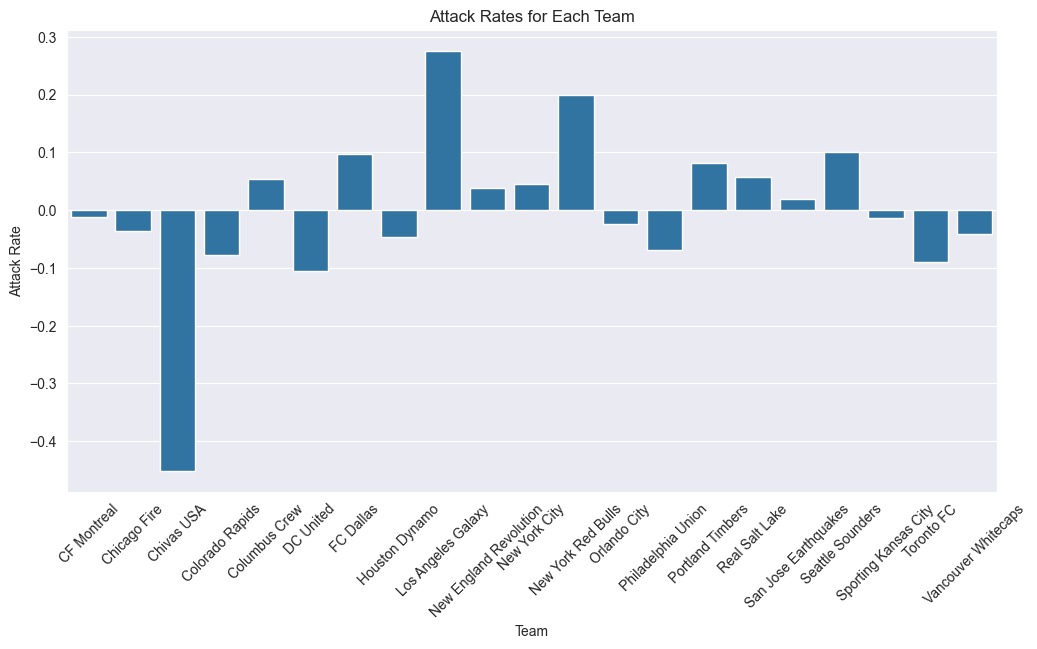

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x=team_names, y=attack_rates)
plt.title('Attack Rates for Each Team')
plt.xlabel('Team')
plt.ylabel('Attack Rate')
plt.xticks(rotation=45)
plt.show()

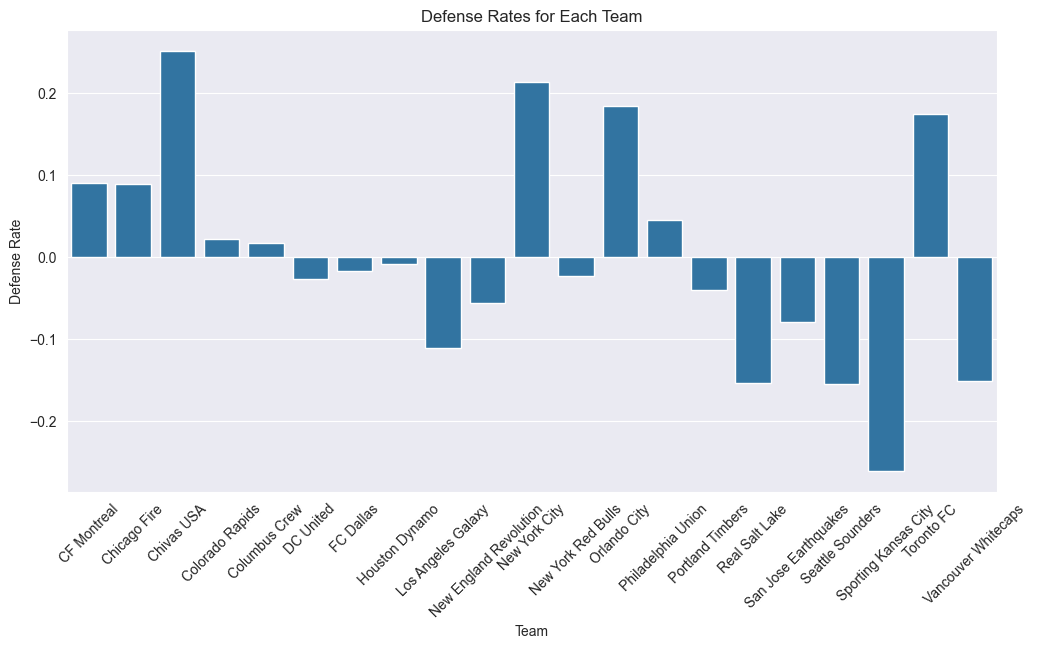

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=team_names, y=defense_rates)
plt.title('Defense Rates for Each Team')
plt.xlabel('Team')
plt.ylabel('Defense Rate')
plt.xticks(rotation=45)
plt.show()

In [15]:
team_params = pd.DataFrame({'Team': team_names,
                            'Attack (alpha)': attack_rates, 'Defense (beta)': defense_rates})
print(tabulate(team_params, headers='keys', tablefmt='pipe'))

|    | Team                   |   Attack (alpha) |   Defense (beta) |
|---:|:-----------------------|-----------------:|-----------------:|
|  0 | CF Montreal            |       -0.0118365 |        0.089633  |
|  1 | Chicago Fire           |       -0.036478  |        0.0893834 |
|  2 | Chivas USA             |       -0.451618  |        0.251015  |
|  3 | Colorado Rapids        |       -0.0777922 |        0.0214911 |
|  4 | Columbus Crew          |        0.0534429 |        0.0172086 |
|  5 | DC United              |       -0.105106  |       -0.0273427 |
|  6 | FC Dallas              |        0.0967216 |       -0.0169966 |
|  7 | Houston Dynamo         |       -0.0474782 |       -0.0088749 |
|  8 | Los Angeles Galaxy     |        0.275566  |       -0.111347  |
|  9 | New England Revolution |        0.0387508 |       -0.0557754 |
| 10 | New York City          |        0.0454879 |        0.213545  |
| 11 | New York Red Bulls     |        0.198987  |       -0.0230338 |
| 12 | Orlando City 